## 1. Supervised, Semi-Supervised, and Unsupervised Learning

Import packages

In [1]:
import numpy as np
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
import os
import re
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, f1_score, roc_curve, auc
from scipy.special import softmax
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from random import shuffle
import warnings
warnings.filterwarnings("ignore")

### (a) Download the Breast Cancer Wisconsin (Diagnostic) Data Set

In [2]:
cname = ['id','diagnosis']
for i in range(1,31):
    cname.append('inp_feature_'+str(i))

In [3]:
bcancer_data = pd.read_csv("../data/wdbc.data",delimiter=",",names=cname)

In [4]:
bcancer_data

,id,diagnosis,inp_feature_1,inp_feature_2,inp_feature_3,inp_feature_4,inp_feature_5,inp_feature_6,inp_feature_7,inp_feature_8,...,inp_feature_21,inp_feature_22,inp_feature_23,inp_feature_24,inp_feature_25,inp_feature_26,inp_feature_27,inp_feature_28,inp_feature_29,inp_feature_30
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [5]:
corder = ['id']
corder.extend(cname[2:])
corder.append('diagnosis')
bcancer_data = bcancer_data[corder]

In [6]:
bcancer_data

,id,inp_feature_1,inp_feature_2,inp_feature_3,inp_feature_4,inp_feature_5,inp_feature_6,inp_feature_7,inp_feature_8,inp_feature_9,...,inp_feature_22,inp_feature_23,inp_feature_24,inp_feature_25,inp_feature_26,inp_feature_27,inp_feature_28,inp_feature_29,inp_feature_30,diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,M
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,M
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,M
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,M
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,M
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,M
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,M
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,M


In [7]:
# M = 1 and B = 0
bcancer_data = bcancer_data.replace(to_replace="M",value=1)
bcancer_data = bcancer_data.replace(to_replace="B",value=0)

In [8]:
bcancer_data

,id,inp_feature_1,inp_feature_2,inp_feature_3,inp_feature_4,inp_feature_5,inp_feature_6,inp_feature_7,inp_feature_8,inp_feature_9,...,inp_feature_22,inp_feature_23,inp_feature_24,inp_feature_25,inp_feature_26,inp_feature_27,inp_feature_28,inp_feature_29,inp_feature_30,diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


In [9]:
benign_df = bcancer_data[bcancer_data['diagnosis']==0]

In [10]:
benign_df

,id,inp_feature_1,inp_feature_2,inp_feature_3,inp_feature_4,inp_feature_5,inp_feature_6,inp_feature_7,inp_feature_8,inp_feature_9,...,inp_feature_22,inp_feature_23,inp_feature_24,inp_feature_25,inp_feature_26,inp_feature_27,inp_feature_28,inp_feature_29,inp_feature_30,diagnosis
19,8510426,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,0
20,8510653,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,0
21,8510824,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,0
37,854941,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,0
46,85713702,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,925277,14.590,22.68,96.39,657.1,0.08473,0.13300,0.10290,0.037360,0.1454,...,27.27,105.90,733.5,0.10260,0.31710,0.36620,0.11050,0.2258,0.08004,0
559,925291,11.510,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.041050,0.1388,...,37.16,82.28,474.2,0.12980,0.25170,0.36300,0.09653,0.2112,0.08732,0
560,925292,14.050,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.043040,0.1537,...,33.17,100.20,706.7,0.12410,0.22640,0.13260,0.10480,0.2250,0.08321,0
561,925311,11.200,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.000000,0.1060,...,38.30,75.19,439.6,0.09267,0.05494,0.00000,0.00000,0.1566,0.05905,0


In [11]:
malignant_df = bcancer_data[bcancer_data['diagnosis']==1]

In [12]:
malignant_df

,id,inp_feature_1,inp_feature_2,inp_feature_3,inp_feature_4,inp_feature_5,inp_feature_6,inp_feature_7,inp_feature_8,inp_feature_9,...,inp_feature_22,inp_feature_23,inp_feature_24,inp_feature_25,inp_feature_26,inp_feature_27,inp_feature_28,inp_feature_29,inp_feature_30,diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,926125,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,...,29.41,179.10,1819.0,0.1407,0.4186,0.6599,0.2542,0.2929,0.09873,1
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.1410,0.2113,0.4107,0.2216,0.2060,0.07115,1
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.1166,0.1922,0.3215,0.1628,0.2572,0.06637,1
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.1139,0.3094,0.3403,0.1418,0.2218,0.07820,1


In [13]:
def custom_test_train_split(test_split,bdata,mdata):
    msplit = mdata.sample(n=int(test_split*len(mdata.index)))
    bsplit = bdata.sample(n=int(test_split*len(bdata.index)))
    test_data = pd.concat([msplit,bsplit],axis=0)
    mtrain = mdata.drop(msplit.index)
    btrain = bdata.drop(bsplit.index)
    train_data = pd.concat([mtrain,btrain],axis=0)
    train_y = train_data['diagnosis']
    train_x = train_data.drop(['id','diagnosis'],axis="columns")
    test_y = test_data['diagnosis']
    test_x = test_data.drop(['id','diagnosis'],axis="columns")
    return (train_x,train_y,test_x,test_y)

In [14]:
train_x,train_y,test_x,test_y = custom_test_train_split(0.20,benign_df,malignant_df)

In [15]:
train_x

,inp_feature_1,inp_feature_2,inp_feature_3,inp_feature_4,inp_feature_5,inp_feature_6,inp_feature_7,inp_feature_8,inp_feature_9,inp_feature_10,...,inp_feature_21,inp_feature_22,inp_feature_23,inp_feature_24,inp_feature_25,inp_feature_26,inp_feature_27,inp_feature_28,inp_feature_29,inp_feature_30
1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
2,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
3,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300
4,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
5,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.08089,0.2087,0.07613,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,10.160,19.59,64.73,311.7,0.10030,0.07504,0.005025,0.01116,0.1791,0.06331,...,10.650,22.88,67.88,347.3,0.12650,0.12000,0.01005,0.02232,0.2262,0.06742
557,9.423,27.88,59.26,271.3,0.08123,0.04971,0.000000,0.00000,0.1742,0.06059,...,10.490,34.24,66.50,330.6,0.10730,0.07158,0.00000,0.00000,0.2475,0.06969
558,14.590,22.68,96.39,657.1,0.08473,0.13300,0.102900,0.03736,0.1454,0.06147,...,15.480,27.27,105.90,733.5,0.10260,0.31710,0.36620,0.11050,0.2258,0.08004
560,14.050,27.15,91.38,600.4,0.09929,0.11260,0.044620,0.04304,0.1537,0.06171,...,15.300,33.17,100.20,706.7,0.12410,0.22640,0.13260,0.10480,0.2250,0.08321


In [16]:
train_y

1      1
2      1
3      1
4      1
5      1
      ..
556    0
557    0
558    0
560    0
568    0
Name: diagnosis, Length: 456, dtype: int64

In [17]:
test_x

,inp_feature_1,inp_feature_2,inp_feature_3,inp_feature_4,inp_feature_5,inp_feature_6,inp_feature_7,inp_feature_8,inp_feature_9,inp_feature_10,...,inp_feature_21,inp_feature_22,inp_feature_23,inp_feature_24,inp_feature_25,inp_feature_26,inp_feature_27,inp_feature_28,inp_feature_29,inp_feature_30
280,19.16,26.60,126.20,1138.0,0.10200,0.14530,0.19210,0.09664,0.1902,0.06220,...,23.72,35.90,159.80,1724.0,0.1782,0.3841,0.57540,0.18720,0.3258,0.09720
408,17.99,20.66,117.80,991.7,0.10360,0.13040,0.12010,0.08824,0.1992,0.06069,...,21.08,25.41,138.10,1349.0,0.1482,0.3735,0.33010,0.19740,0.3060,0.08503
30,18.63,25.11,124.80,1088.0,0.10640,0.18870,0.23190,0.12440,0.2183,0.06197,...,23.15,34.01,160.50,1670.0,0.1491,0.4257,0.61330,0.18480,0.3444,0.09782
64,12.68,23.84,82.69,499.0,0.11220,0.12620,0.11280,0.06873,0.1905,0.06590,...,17.09,33.47,111.80,888.3,0.1851,0.4061,0.40240,0.17160,0.3383,0.10310
141,16.11,18.05,105.10,813.0,0.09721,0.11370,0.09447,0.05943,0.1861,0.06248,...,19.92,25.27,129.00,1233.0,0.1314,0.2236,0.28020,0.12160,0.2792,0.08158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,10.49,18.61,66.86,334.3,0.10680,0.06678,0.02297,0.01780,0.1482,0.06600,...,11.06,24.54,70.76,375.4,0.1413,0.1044,0.08423,0.06528,0.2213,0.07842
506,12.22,20.04,79.47,453.1,0.10960,0.11520,0.08175,0.02166,0.2124,0.06894,...,13.16,24.17,85.13,515.3,0.1402,0.2315,0.35350,0.08088,0.2709,0.08839
347,14.76,14.74,94.87,668.7,0.08875,0.07780,0.04608,0.03528,0.1521,0.05912,...,17.27,17.93,114.20,880.8,0.1220,0.2009,0.21510,0.12510,0.3109,0.08187
348,11.47,16.03,73.02,402.7,0.09076,0.05886,0.02587,0.02322,0.1634,0.06372,...,12.51,20.79,79.67,475.8,0.1531,0.1120,0.09823,0.06548,0.2851,0.08763


In [18]:
test_y

280    1
408    1
30     1
64     1
141    1
      ..
303    0
506    0
347    0
348    0
476    0
Name: diagnosis, Length: 113, dtype: int64

### (b) Monte-Carlo Simulation

#### (i) Supervised Learning

In [19]:
class PrepareData():
    def __init__(self,bdata,mdata):
        self.bdata = bdata
        self.mdata = mdata
        
    def custom_test_train_split(self,test_split):
        msplit = self.mdata.sample(n=int(test_split*len(self.mdata.index)))
        bsplit = self.bdata.sample(n=int(test_split*len(self.bdata.index)))
        test_data = pd.concat([msplit,bsplit],axis=0)
        mtrain = self.mdata.drop(msplit.index)
        btrain = self.bdata.drop(bsplit.index)
        train_data = pd.concat([mtrain,btrain],axis=0)
        train_y = train_data['diagnosis']
        train_x = train_data.drop(['id','diagnosis'],axis="columns")
        test_y = test_data['diagnosis']
        test_x = test_data.drop(['id','diagnosis'],axis="columns")
        return (train_x,train_y,test_x,test_y)
    
    def get_normalized_data(self,train_x,test_x):
        scaler = Normalizer()
        tr_x_norm = scaler.fit_transform(train_x)
        tst_x_norm = scaler.transform(test_x)
        return (tr_x_norm,tst_x_norm)    

In [20]:
class EvaluateModel():
    def __init__(self,true_value,predict,probability,report):
        self.predict = predict
        self.true_value = true_value
        self.probability = probability
        self.report = report
    
    def get_model_metrics(self):
        accuracy = self.report['accuracy']
        fp_rate, tp_rate, thresholds = roc_curve(self.true_value,self.probability, pos_label=1)
        roc_auc = round(auc(fp_rate, tp_rate), 4)
        return [accuracy,self.report['weighted avg']['precision'],self.report['weighted avg']['recall'],
                self.report['weighted avg']['f1-score'],roc_auc]
    
    def get_confusion_matrix(self):
        return confusion_matrix(self.true_value,self.predict)
    
    def get_model_summary(self):
        print(f"Confusion matrix: {self.get_confusion_matrix()}")
        print(f"Model accuracy: {self.report['accuracy']}")
        
    def plot_summary(self,title):     
        fp_rate, tp_rate, thresholds = roc_curve(self.true_value,self.probability, pos_label=1)
        roc_auc = round(auc(fp_rate, tp_rate), 4)
        fig, axes = plt.subplots(figsize=(8, 5))
        axes.plot(fp_rate, tp_rate, label= f'ROC curve (area = {roc_curve})')
        axes.plot([0, 1], [0, 1], "--")
        axes.set_xlabel("False Positive Rate")
        axes.set_ylabel("True Positive Rate")
        axes.legend()
        axes.set_title(f"ROC curve({title} set)")
        plt.show()    

In [21]:
tuned_params = {'C' : np.logspace(-2, 7, 20)}
params = {'param_grid' : tuned_params, 'scoring' : 'f1_weighted', 'n_jobs' : -1, 'verbose' : 0}
scols = ['accuracy', 'precision', 'recall', 'f1-score', 'auc']
tr_summary = []
tst_summary = []
mcols = ['Training Accuracy','Test Accuracy','Best Parameter Setting']
attempts = []
msummary = []
for i in range(1,31):
    attempts.append('Attempt '+str(i))
    prep = PrepareData(benign_df,malignant_df)
    train_x, train_y, test_x, test_y = prep.custom_test_train_split(0.2)
    train_x,test_x = prep.get_normalized_data(train_x, test_x)
    params['cv'] = StratifiedKFold(5, random_state=i, shuffle=True)
    gcv = GridSearchCV(estimator=LinearSVC(penalty='l1', dual=False), **params)
    gcv.fit(train_x, train_y)
    tr_y_prob = gcv.decision_function(train_x)
    tr_y_pred = gcv.predict(train_x)
    train_report = classification_report(train_y, tr_y_pred, output_dict=True)
    tr_eval = EvaluateModel(train_y,tr_y_pred,tr_y_prob,train_report)
    tr_summary.append(tr_eval.get_model_metrics())
    tst_y_prob = gcv.decision_function(test_x)
    tst_y_pred = gcv.predict(test_x)
    test_report = classification_report(test_y, tst_y_pred, output_dict=True)
    tst_eval = EvaluateModel(test_y,tst_y_pred,tst_y_prob,test_report)
    tst_summary.append(tst_eval.get_model_metrics())
    msummary.append([train_report['accuracy'], test_report['accuracy'],gcv.best_params_])

In [22]:
msumm_df = pd.DataFrame(msummary,columns=mcols,index=attempts)

In [23]:
msumm_df

,Training Accuracy,Test Accuracy,Best Parameter Setting
Attempt 1,0.986842,0.973451,{'C': 14384.498882876629}
Attempt 2,0.995614,0.938053,{'C': 3359818.2862837743}
Attempt 3,0.978070,0.938053,{'C': 1623.776739188721}
Attempt 4,0.978070,0.929204,{'C': 1623.776739188721}
Attempt 5,0.980263,0.964602,{'C': 14384.498882876629}
Attempt 6,0.984649,0.973451,{'C': 4832.930238571752}
Attempt 7,0.984649,0.955752,{'C': 14384.498882876629}
Attempt 8,0.984649,0.964602,{'C': 14384.498882876629}
Attempt 9,0.984649,0.929204,{'C': 4832.930238571752}
Attempt 10,0.973684,0.964602,{'C': 1623.776739188721}



Monte Carlo's 30th run

Confusion matrix: [[284   2]
 [  3 167]]
Model accuracy: 0.9890350877192983


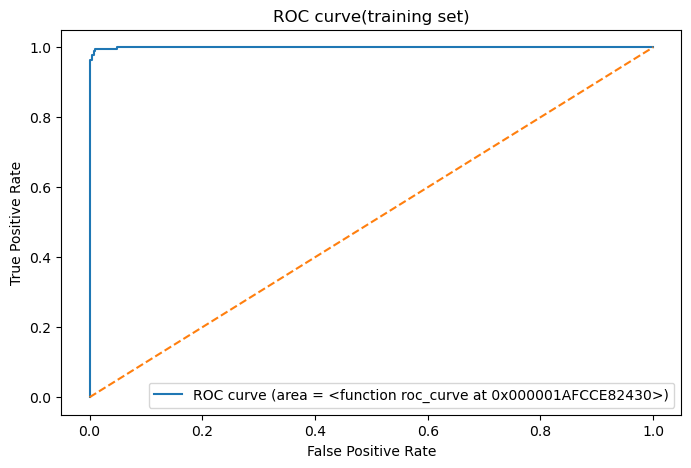

Confusion matrix: [[68  3]
 [ 2 40]]
Model accuracy: 0.9557522123893806


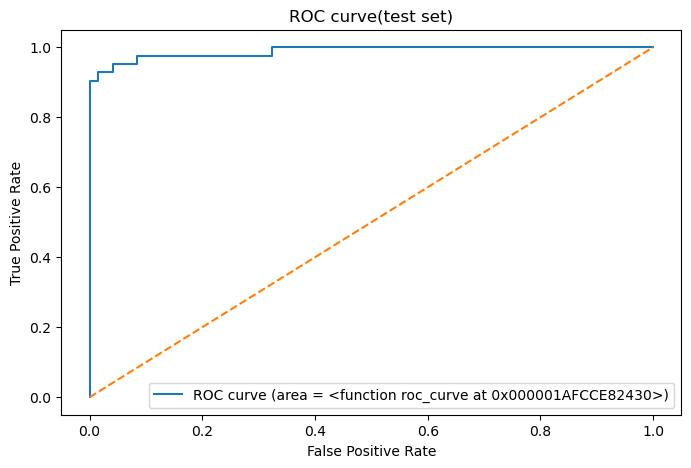

In [24]:
print("\nMonte Carlo's 30th run\n")
tr_eval.get_model_summary()
tr_eval.plot_summary('training')
tst_eval.get_model_summary()
tst_eval.plot_summary('test')

In [25]:
trsumm_df = pd.DataFrame(tr_summary,columns=scols,index=attempts)

In [26]:
trsumm_df

,accuracy,precision,recall,f1-score,auc
Attempt 1,0.986842,0.986941,0.986842,0.986809,0.9987
Attempt 2,0.995614,0.995644,0.995614,0.995609,0.9999
Attempt 3,0.978070,0.978070,0.978070,0.978070,0.9969
Attempt 4,0.978070,0.978070,0.978070,0.978070,0.9973
Attempt 5,0.980263,0.980282,0.980263,0.980227,0.9981
Attempt 6,0.984649,0.984641,0.984649,0.984640,0.9983
Attempt 7,0.984649,0.984684,0.984649,0.984621,0.9990
Attempt 8,0.984649,0.984684,0.984649,0.984621,0.9983
Attempt 9,0.984649,0.984684,0.984649,0.984621,0.9976
Attempt 10,0.973684,0.973684,0.973684,0.973684,0.9967


In [27]:
tstsumm_df = pd.DataFrame(tst_summary,columns=scols,index=attempts)

In [28]:
tstsumm_df

,accuracy,precision,recall,f1-score,auc
Attempt 1,0.973451,0.973481,0.973451,0.973384,0.9819
Attempt 2,0.938053,0.940222,0.938053,0.938453,0.9879
Attempt 3,0.938053,0.940222,0.938053,0.938453,0.9816
Attempt 4,0.929204,0.929204,0.929204,0.929204,0.9886
Attempt 5,0.964602,0.964602,0.964602,0.964602,0.9926
Attempt 6,0.973451,0.973481,0.973451,0.973384,0.9963
Attempt 7,0.955752,0.955689,0.955752,0.955640,0.9899
Attempt 8,0.964602,0.964602,0.964602,0.964602,0.9946
Attempt 9,0.929204,0.930445,0.929204,0.929521,0.9668
Attempt 10,0.964602,0.964602,0.964602,0.964602,0.9963


In [29]:
n = len(trsumm_df.index)
s = pd.DataFrame([[sum(list(trsumm_df['accuracy']))/n,sum(list(trsumm_df['precision']))/n,sum(list(trsumm_df['recall']))/n,
                   sum(list(trsumm_df['f1-score']))/n,sum(list(trsumm_df['auc']))/n],
                 [sum(list(tstsumm_df['accuracy']))/n,sum(list(tstsumm_df['precision']))/n,sum(list(tstsumm_df['recall']))/n,
                   sum(list(tstsumm_df['f1-score']))/n,sum(list(tstsumm_df['auc']))/n]],columns=scols,index=['training','test'])

In [30]:
s

,accuracy,precision,recall,f1-score,auc
training,0.983772,0.983809,0.983772,0.983748,0.998487
test,0.957522,0.958097,0.957522,0.957556,0.989150


#### (ii) Semi-Supervised Learning/ Self-training

##### (A)

In [31]:
class SemiSupervised():
    def __init__(self,train_x,train_y,params):
        self.train_x = train_x
        self.train_y = train_y
        self.params = params
        
    def get_semi_supervised_model(self):
        idx_labeled = []
        for c in [0, 1]:
            idx, = np.where(self.train_y == c)
            idx_num = round(len(idx) * 0.5)
            select_idx = np.random.choice(idx, idx_num, replace=False)
            idx_labeled.extend(select_idx)
        idx_unlabeled = [i for i in range(len(self.train_x)) if i not in idx_labeled]
        x_labeled = self.train_x[idx_labeled].tolist()
        y_labeled = self.train_y.iloc[idx_labeled].tolist()  
        x_unlabeled = self.train_x[idx_unlabeled].tolist()
        y_unlabeled = self.train_y.iloc[idx_unlabeled].to_numpy().tolist()
        semi_gcv = GridSearchCV(estimator=LinearSVC(penalty='l1', dual=False), **self.params)
        semi_gcv.fit(x_labeled, y_labeled)
        while len(x_unlabeled) > 0:
            scores = semi_gcv.decision_function(x_unlabeled)
            idx_sort = sorted([i for i in range(len(x_unlabeled))], key=lambda x : abs(scores[x]))
            x_unlabeled = [x_unlabeled[i] for i in idx_sort]
            y_unlabeled = [y_unlabeled[i] for i in idx_sort]
            x_labeled.append(x_unlabeled.pop())
            y_labeled.append(y_unlabeled.pop())
            semi_gcv.best_estimator_.fit(x_labeled, y_labeled)
        return semi_gcv

##### (B)

In [32]:
semi_tuned_params = {'C' : np.logspace(-2, 7, 10)}  
parameters = {'param_grid' : semi_tuned_params, 'scoring' : 'f1_weighted', 'n_jobs' : -1, 'verbose' : 0}
semi_tr_summary = []
semi_tst_summary = []
attempts = []
semi_summary = []
for i in range(1,31):
    attempts.append('Attempt '+str(i))
    prep = PrepareData(benign_df,malignant_df)
    train_x, train_y, test_x, test_y = prep.custom_test_train_split(0.2)
    train_x,test_x = prep.get_normalized_data(train_x, test_x)
    ssup = SemiSupervised(train_x,train_y,parameters)
    semi_sup = ssup.get_semi_supervised_model()
    tr_y_prob = semi_sup.decision_function(train_x)
    tr_y_pred = semi_sup.predict(train_x)
    train_report = classification_report(train_y, tr_y_pred, output_dict=True)
    tr_eval = EvaluateModel(train_y,tr_y_pred,tr_y_prob,train_report)
    semi_tr_summary.append(tr_eval.get_model_metrics())
    tst_y_prob = semi_sup.decision_function(test_x)
    tst_y_pred = semi_sup.predict(test_x)
    test_report = classification_report(test_y, tst_y_pred, output_dict=True)
    tst_eval = EvaluateModel(test_y,tst_y_pred,tst_y_prob,test_report)
    semi_tst_summary.append(tst_eval.get_model_metrics())
    semi_summary.append([train_report['accuracy'], test_report['accuracy'],semi_sup.best_params_])

In [33]:
semi_summ_df = pd.DataFrame(semi_summary,columns=mcols,index=attempts)

In [34]:
semi_summ_df

,Training Accuracy,Test Accuracy,Best Parameter Setting
Attempt 1,0.982456,0.964602,{'C': 10000.0}
Attempt 2,0.986842,0.973451,{'C': 1000000.0}
Attempt 3,0.989035,0.929204,{'C': 1000000.0}
Attempt 4,0.982456,0.973451,{'C': 1000000.0}
Attempt 5,0.993421,0.955752,{'C': 10000000.0}
Attempt 6,0.969298,0.964602,{'C': 1000.0}
Attempt 7,0.967105,0.955752,{'C': 1000.0}
Attempt 8,0.980263,0.982301,{'C': 10000.0}
Attempt 9,0.984649,0.955752,{'C': 10000.0}
Attempt 10,0.986842,0.964602,{'C': 10000.0}


Confusion matrix: [[279   7]
 [  7 163]]
Model accuracy: 0.9692982456140351


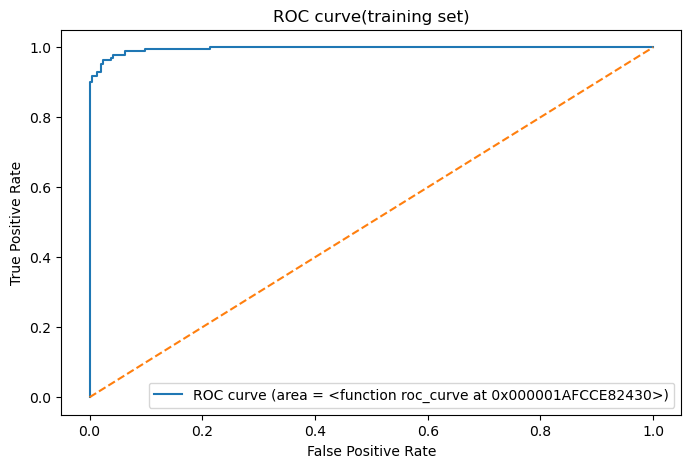

Confusion matrix: [[69  2]
 [ 3 39]]
Model accuracy: 0.9557522123893806


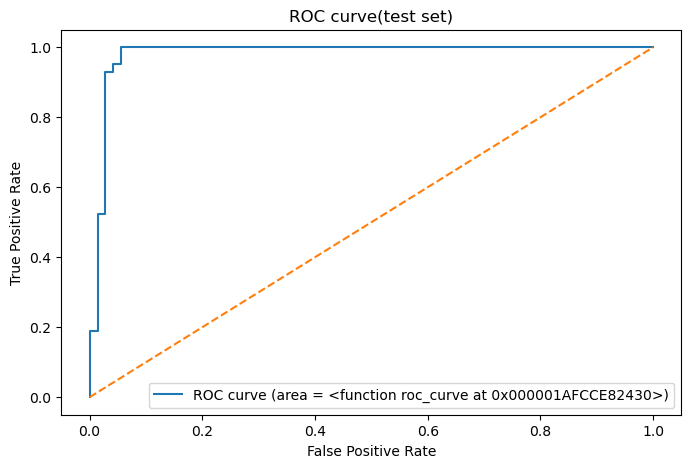

In [35]:
tr_eval.get_model_summary()
tr_eval.plot_summary('training')
tst_eval.get_model_summary()
tst_eval.plot_summary('test')

In [36]:
semi_trsumm_df = pd.DataFrame(semi_tr_summary,columns=scols,index=attempts)

In [37]:
semi_trsumm_df

,accuracy,precision,recall,f1-score,auc
Attempt 1,0.982456,0.982456,0.982456,0.982456,0.9981
Attempt 2,0.986842,0.986842,0.986842,0.986842,0.9993
Attempt 3,0.989035,0.989032,0.989035,0.989028,0.9995
Attempt 4,0.982456,0.982532,0.982456,0.982413,0.9991
Attempt 5,0.993421,0.993439,0.993421,0.993425,0.9999
Attempt 6,0.969298,0.969298,0.969298,0.969298,0.9965
Attempt 7,0.967105,0.967074,0.967105,0.967045,0.9957
Attempt 8,0.980263,0.980282,0.980263,0.980227,0.9980
Attempt 9,0.984649,0.984641,0.984649,0.984640,0.9986
Attempt 10,0.986842,0.986851,0.986842,0.986826,0.9983


In [38]:
semi_tstsumm_df = pd.DataFrame(semi_tst_summary,columns=scols,index=attempts)

In [39]:
semi_tstsumm_df

,accuracy,precision,recall,f1-score,auc
Attempt 1,0.964602,0.967680,0.964602,0.964893,0.9993
Attempt 2,0.973451,0.973737,0.973451,0.973513,0.9779
Attempt 3,0.929204,0.930172,0.929204,0.928403,0.9769
Attempt 4,0.973451,0.973737,0.973451,0.973513,0.9940
Attempt 5,0.955752,0.956507,0.955752,0.955391,0.9852
Attempt 6,0.964602,0.964887,0.964602,0.964416,0.9963
Attempt 7,0.955752,0.957722,0.955752,0.956038,0.9960
Attempt 8,0.982301,0.982786,0.982301,0.982208,0.9997
Attempt 9,0.955752,0.955689,0.955752,0.955640,0.9977
Attempt 10,0.964602,0.965552,0.964602,0.964761,0.9980


In [40]:
n1 = len(semi_trsumm_df.index)
s1 = pd.DataFrame([[sum(list(semi_trsumm_df['accuracy']))/n1,sum(list(semi_trsumm_df['precision']))/n1,sum(list(semi_trsumm_df['recall']))/n1,
                   sum(list(semi_trsumm_df['f1-score']))/n1,sum(list(semi_trsumm_df['auc']))/n1],
                 [sum(list(semi_tstsumm_df['accuracy']))/n1,sum(list(semi_tstsumm_df['precision']))/n1,sum(list(semi_tstsumm_df['recall']))/n1,
                   sum(list(semi_tstsumm_df['f1-score']))/n1,sum(list(semi_tstsumm_df['auc']))/n1]],columns=scols,index=['training','test'])

In [41]:
s1

,accuracy,precision,recall,f1-score,auc
training,0.983480,0.983499,0.983480,0.983462,0.998490
test,0.956637,0.957261,0.956637,0.956548,0.990543


#### (iii) Unsupervised Learning

##### (A)

In K-means algorithm, we can avoid local minimum by controlling the number of iterations to run

##### (B)

In [42]:
class KMeansMetrics():
    def __init__(self,centers,x_data,cluster_label,y_data):
        self.centers = centers
        self.x_data = x_data
        self.y_data = y_data
        self.cluster_label = cluster_label
    
    def get_distance(self):
        dist = np.ndarray((self.x_data.shape[0],))
        probability = np.ndarray((self.x_data.shape[0], 2))
        for i, x in enumerate(self.x_data):
            center = self.centers[self.cluster_label[i]]
            dist[i] = np.linalg.norm(x - center)
            probability[i, 0] = np.linalg.norm(x - self.centers[0])
            probability[i, 1] = np.linalg.norm(x - self.centers[1])
        probability = softmax(probability, axis=1).astype(np.float64)
        return dist, probability

    def get_majority_label(self,dist):
        label = np.ndarray((2,), dtype='int')
        major_label = self.cluster_label.copy()
        for cluster in [0, 1]:
            sample_idx, = np.where(self.cluster_label == cluster)
            top_30 = sorted(sample_idx.tolist(), key=lambda i : dist[i])[:30]
            majority = self.y_data.iloc[top_30].value_counts().index[0]
            major_label[sample_idx] = majority
            label[majority] = cluster
        return (label, major_label)

In [43]:
unsup_tr_summary = []
unsup_tst_summary = []
attempts = []
unsup_summary = []
for i in range(1,31):
    attempts.append('Attempt '+str(i))
    prep = PrepareData(benign_df,malignant_df)
    train_x, train_y, test_x, test_y = prep.custom_test_train_split(0.2)
    train_x,test_x = prep.get_normalized_data(train_x, test_x)
    clusters = KMeans(n_clusters=2, n_init = 15, random_state=i).fit(train_x)
    tr_clabels = clusters.predict(train_x)
    kmeans = KMeansMetrics(clusters.cluster_centers_,train_x,tr_clabels,train_y)
    tr_dist,tr_y_prob = kmeans.get_distance()
    label, tr_y_pred = kmeans.get_majority_label(tr_dist)
    positive_cluster = label[0]
    tr_y_prob = tr_y_prob[:, positive_cluster]
    train_report = classification_report(train_y, tr_y_pred, output_dict=True)
    tr_eval = EvaluateModel(train_y,tr_y_pred,tr_y_prob,train_report)
    unsup_tr_summary.append(tr_eval.get_model_metrics())
    tst_clabels = clusters.predict(test_x)
    kmeans = KMeansMetrics(clusters.cluster_centers_,test_x,tst_clabels,test_y)
    tst_dist,tst_y_prob = kmeans.get_distance()
    label, tst_y_pred = kmeans.get_majority_label(tst_dist)
    positive_cluster = label[0]
    tst_y_prob = tst_y_prob[:, positive_cluster]
    test_report = classification_report(test_y, tst_y_pred, output_dict=True)
    tst_eval = EvaluateModel(test_y,tst_y_pred,tst_y_prob,test_report)
    unsup_tst_summary.append(tst_eval.get_model_metrics())
    unsup_summary.append([train_report['accuracy'], test_report['accuracy'],'-'])

In [44]:
unsup_summ_df = pd.DataFrame(unsup_summary,columns=mcols,index=attempts)

In [45]:
unsup_summ_df

,Training Accuracy,Test Accuracy,Best Parameter Setting
Attempt 1,0.885965,0.867257,-
Attempt 2,0.883772,0.876106,-
Attempt 3,0.892544,0.867257,-
Attempt 4,0.881579,0.929204,-
Attempt 5,0.890351,0.876106,-
Attempt 6,0.883772,0.876106,-
Attempt 7,0.890351,0.902655,-
Attempt 8,0.899123,0.902655,-
Attempt 9,0.881579,0.911504,-
Attempt 10,0.883772,0.902655,-


Confusion matrix: [[283   3]
 [ 52 118]]
Model accuracy: 0.8793859649122807


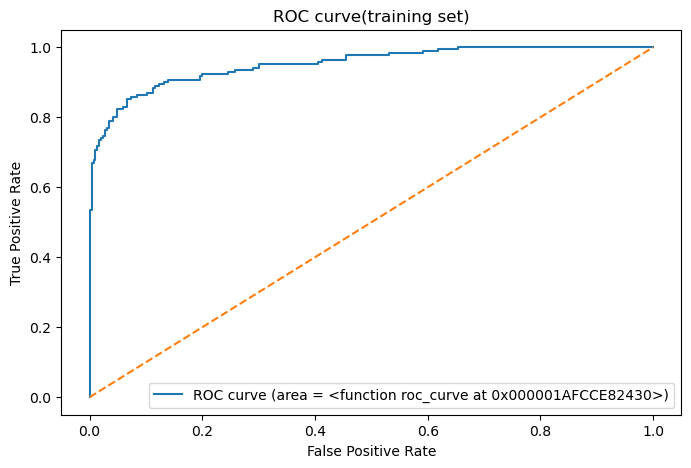

Confusion matrix: [[69  2]
 [11 31]]
Model accuracy: 0.8849557522123894


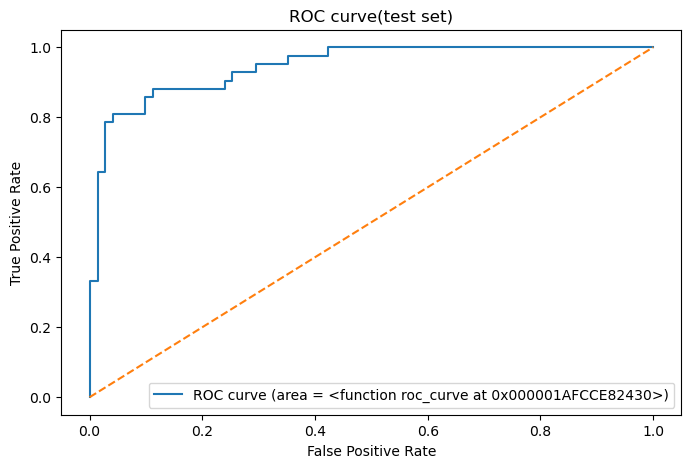

In [46]:
tr_eval.get_model_summary()
tr_eval.plot_summary('training')
tst_eval.get_model_summary()
tst_eval.plot_summary('test')

In [47]:
unsup_trsumm_df = pd.DataFrame(unsup_tr_summary,columns=scols,index=attempts)

In [48]:
unsup_trsumm_df

,accuracy,precision,recall,f1-score,auc
Attempt 1,0.885965,0.895565,0.885965,0.881829,0.9493
Attempt 2,0.883772,0.892513,0.883772,0.879690,0.9422
Attempt 3,0.892544,0.900858,0.892544,0.889012,0.9539
Attempt 4,0.881579,0.890740,0.881579,0.877284,0.9454
Attempt 5,0.890351,0.899086,0.890351,0.886624,0.9504
Attempt 6,0.883772,0.896734,0.883772,0.878862,0.9499
Attempt 7,0.890351,0.896769,0.890351,0.887105,0.9463
Attempt 8,0.899123,0.902466,0.899123,0.896950,0.9592
Attempt 9,0.881579,0.893517,0.881579,0.876722,0.9496
Attempt 10,0.883772,0.892513,0.883772,0.879690,0.9558


In [49]:
unsup_tstsumm_df = pd.DataFrame(unsup_tst_summary,columns=scols,index=attempts)

In [50]:
unsup_tstsumm_df

,accuracy,precision,recall,f1-score,auc
Attempt 1,0.867257,0.882464,0.867257,0.860671,0.9376
Attempt 2,0.876106,0.896512,0.876106,0.869276,0.9698
Attempt 3,0.867257,0.882464,0.867257,0.860671,0.9410
Attempt 4,0.929204,0.929088,0.929204,0.928832,0.9698
Attempt 5,0.876106,0.889199,0.876106,0.870609,0.9561
Attempt 6,0.876106,0.883686,0.876106,0.871810,0.9474
Attempt 7,0.902655,0.906263,0.902655,0.900517,0.9678
Attempt 8,0.902655,0.906263,0.902655,0.900517,0.9262
Attempt 9,0.911504,0.914071,0.911504,0.909895,0.9557
Attempt 10,0.902655,0.915713,0.902655,0.898820,0.9212


In [51]:
n2 = len(unsup_trsumm_df.index)
s2 = pd.DataFrame([[sum(list(unsup_trsumm_df['accuracy']))/n2,sum(list(unsup_trsumm_df['precision']))/n2,sum(list(unsup_trsumm_df['recall']))/n2,
                   sum(list(unsup_trsumm_df['f1-score']))/n2,sum(list(unsup_trsumm_df['auc']))/n2],
                 [sum(list(unsup_tstsumm_df['accuracy']))/n2,sum(list(unsup_tstsumm_df['precision']))/n2,sum(list(unsup_tstsumm_df['recall']))/n2,
                   sum(list(unsup_tstsumm_df['f1-score']))/n2,sum(list(unsup_tstsumm_df['auc']))/n2]],columns=scols,index=['training','test'])

In [52]:
s2

,accuracy,precision,recall,f1-score,auc
training,0.887061,0.896323,0.887061,0.883044,0.950213
test,0.884071,0.894614,0.884071,0.879468,0.950783


#### (iv) Spectral Clustering

In [53]:
cluster_tr_summary = []
cluster_tst_summary = []
attempts = []
cluster_summary = []
for i in range(1,31):
    attempts.append('Attempt '+str(i))
    prep = PrepareData(benign_df,malignant_df)
    train_x, train_y, test_x, test_y = prep.custom_test_train_split(0.2)
    train_x,test_x = prep.get_normalized_data(train_x, test_x)
    cluster_label = SpectralClustering(n_clusters=2, assign_labels='kmeans', affinity='rbf', eigen_tol = 1e-2, eigen_solver = 'arpack', random_state=0)
    cluster_label = cluster_label.fit_predict(train_x)
    cluster_centers = []
    for cluster in [0,1]:
        cluster_centers.append(np.mean(train_x[cluster_label==cluster], axis = 0).tolist())
    knn_model = KNeighborsClassifier(n_neighbors=1)
    knn_model.fit(train_x, cluster_label)
    tr_cluster_label = knn_model.predict(train_x)
    knn = KMeansMetrics(cluster_centers,train_x,tr_cluster_label,train_y)
    tr_dist,tr_y_prob = knn.get_distance()
    label, tr_y_pred = knn.get_majority_label(tr_dist)
    positive_cluster = label[0]
    tr_y_prob = tr_y_prob[:, positive_cluster]
    train_report = classification_report(train_y, tr_y_pred, output_dict=True)
    tr_eval = EvaluateModel(train_y,tr_y_pred,tr_y_prob,train_report)
    cluster_tr_summary.append(tr_eval.get_model_metrics())
    tst_cluster_label = knn_model.predict(test_x)
    knn = KMeansMetrics(cluster_centers,test_x,tst_cluster_label,test_y)
    tst_dist,tst_y_prob = knn.get_distance()
    label, tst_y_pred = knn.get_majority_label(tst_dist)
    positive_cluster = label[0]
    tst_y_prob = tst_y_prob[:, positive_cluster]
    test_report = classification_report(test_y, tst_y_pred, output_dict=True)
    tst_eval = EvaluateModel(test_y,tst_y_pred,tst_y_prob,test_report)
    cluster_tst_summary.append(tst_eval.get_model_metrics())
    cluster_summary.append([train_report['accuracy'], test_report['accuracy'],'-'])

In [54]:
cluster_summ_df = pd.DataFrame(cluster_summary,columns=mcols,index=attempts)

In [55]:
cluster_summ_df

,Training Accuracy,Test Accuracy,Best Parameter Setting
Attempt 1,0.872807,0.902655,-
Attempt 2,0.885965,0.867257,-
Attempt 3,0.879386,0.884956,-
Attempt 4,0.883772,0.893805,-
Attempt 5,0.877193,0.902655,-
Attempt 6,0.879386,0.867257,-
Attempt 7,0.888158,0.858407,-
Attempt 8,0.879386,0.884956,-
Attempt 9,0.881579,0.876106,-
Attempt 10,0.883772,0.867257,-


Confusion matrix: [[280   6]
 [ 47 123]]
Model accuracy: 0.8837719298245614


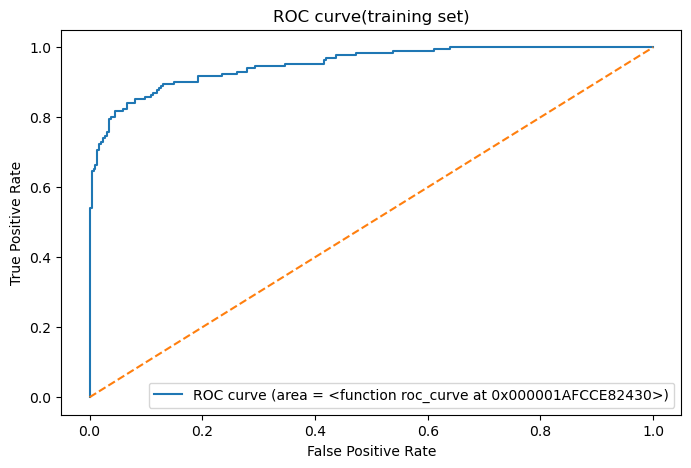

Confusion matrix: [[70  1]
 [10 32]]
Model accuracy: 0.9026548672566371


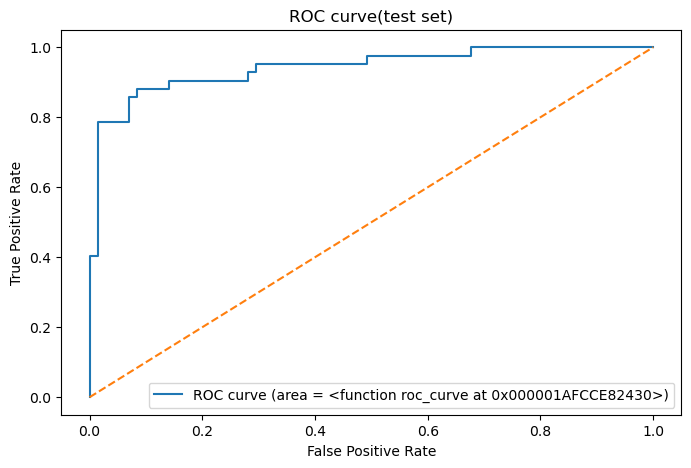

In [56]:
tr_eval.get_model_summary()
tr_eval.plot_summary('training')
tst_eval.get_model_summary()
tst_eval.plot_summary('test')

In [57]:
cluster_trsumm_df = pd.DataFrame(cluster_tr_summary,columns=scols,index=attempts)

In [58]:
cluster_trsumm_df

,accuracy,precision,recall,f1-score,auc
Attempt 1,0.872807,0.885196,0.872807,0.867276,0.9432
Attempt 2,0.885965,0.895565,0.885965,0.881829,0.9494
Attempt 3,0.879386,0.890346,0.879386,0.874585,0.9485
Attempt 4,0.883772,0.891307,0.883772,0.879952,0.9467
Attempt 5,0.877193,0.888622,0.877193,0.872156,0.9524
Attempt 6,0.879386,0.891820,0.879386,0.874291,0.9468
Attempt 7,0.888158,0.897321,0.888158,0.884230,0.9498
Attempt 8,0.879386,0.891820,0.879386,0.874291,0.9464
Attempt 9,0.881579,0.892077,0.881579,0.877007,0.9456
Attempt 10,0.883772,0.892513,0.883772,0.879690,0.9485


In [59]:
cluster_tstsumm_df = pd.DataFrame(cluster_tst_summary,columns=scols,index=attempts)

In [60]:
cluster_tstsumm_df

,accuracy,precision,recall,f1-score,auc
Attempt 1,0.902655,0.915713,0.902655,0.898820,0.9641
Attempt 2,0.867257,0.882464,0.867257,0.860671,0.9561
Attempt 3,0.884956,0.891080,0.884956,0.881482,0.9624
Attempt 4,0.893805,0.903058,0.893805,0.890123,0.9618
Attempt 5,0.902655,0.910197,0.902655,0.899715,0.9349
Attempt 6,0.867257,0.871963,0.867257,0.863248,0.9551
Attempt 7,0.858407,0.875846,0.858407,0.850601,0.9450
Attempt 8,0.884956,0.887588,0.884956,0.882429,0.9567
Attempt 9,0.876106,0.889199,0.876106,0.870609,0.9645
Attempt 10,0.867257,0.882464,0.867257,0.860671,0.9618


In [61]:
n3 = len(cluster_trsumm_df.index)
s3 = pd.DataFrame([[sum(list(cluster_trsumm_df['accuracy']))/n3,sum(list(cluster_trsumm_df['precision']))/n3,sum(list(cluster_trsumm_df['recall']))/n3,
                   sum(list(cluster_trsumm_df['f1-score']))/n3,sum(list(cluster_trsumm_df['auc']))/n3],
                 [sum(list(cluster_tstsumm_df['accuracy']))/n3,sum(list(cluster_tstsumm_df['precision']))/n3,sum(list(cluster_tstsumm_df['recall']))/n3,
                   sum(list(cluster_tstsumm_df['f1-score']))/n3,sum(list(cluster_tstsumm_df['auc']))/n3]],columns=scols,index=['training','test'])

In [62]:
s3

,accuracy,precision,recall,f1-score,auc
training,0.882091,0.892645,0.882091,0.877525,0.94892
test,0.876106,0.887298,0.876106,0.870765,0.95161


#### (iv) Compare

In [63]:
print("Supervised Learning")
print("*******************")
print(s)
print("\n")
print("Semi-Supervised Learning")
print("************************")
print(s1)
print("\n")
print("Unsupervised Learning: K-Means")
print("******************************")
print(s2)
print("\n")
print("Unsupervised Learning: Spectral Clustering")
print("******************************************")
print(s3)

Supervised Learning
*******************
          accuracy  precision    recall  f1-score       auc
training  0.983772   0.983809  0.983772  0.983748  0.998487
test      0.957522   0.958097  0.957522  0.957556  0.989150


Semi-Supervised Learning
************************
          accuracy  precision    recall  f1-score       auc
training  0.983480   0.983499  0.983480  0.983462  0.998490
test      0.956637   0.957261  0.956637  0.956548  0.990543


Unsupervised Learning: K-Means
******************************
          accuracy  precision    recall  f1-score       auc
training  0.887061   0.896323  0.887061  0.883044  0.950213
test      0.884071   0.894614  0.884071  0.879468  0.950783


Unsupervised Learning: Spectral Clustering
******************************************
          accuracy  precision    recall  f1-score      auc
training  0.882091   0.892645  0.882091  0.877525  0.94892
test      0.876106   0.887298  0.876106  0.870765  0.95161


from the above table, we see that for the given dataset, supervised learning works better than unsupervised learning as we use labeled data where the output data patterns are known beforehand.

## 2. Active Learning Using Support Vector Machines

### (a) Download the banknote authentication Data Set

In [64]:
bank_note = pd.read_csv("../data/data_banknote_authentication.txt",delimiter=",",names=['variance', 'skewness', 'curtosis', 'entropy', 'class'])

In [65]:
bank_note

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [66]:
def split_bank_data(bank_note):    
    btest_data = bank_note.sample(n=472)
    btrain_data = bank_note.drop(btest_data.index)
    btrain_y = btrain_data['class']
    btrain_x = btrain_data.drop(['class'],axis="columns")
    btest_y = btest_data['class']
    btest_x = btest_data.drop(['class'],axis="columns")
    return (btrain_x,btrain_y,btest_x,btest_y)

In [67]:
btrain_x,btrain_y,btest_x,btest_y = split_bank_data(bank_note)

In [68]:
btest_x

,variance,skewness,curtosis,entropy
1109,-0.40857,3.09770,-2.960700,-2.689200
1071,-2.53730,-6.95900,8.805400,1.528900
691,0.57060,-0.02480,1.242100,-0.562100
1350,-0.21888,-2.20380,-0.095400,0.564210
931,-0.49241,0.89392,-1.628300,-0.568540
...,...,...,...,...
614,2.50890,6.84100,-0.029423,0.449120
343,0.66018,10.38780,-1.402900,-3.915100
1250,-2.43650,3.60260,-1.416600,-2.894800
781,-1.82190,-6.88240,5.468100,0.057313


In [69]:
btest_y

1109    1
1071    1
691     0
1350    1
931     1
       ..
614     0
343     0
1250    1
781     1
612     0
Name: class, Length: 472, dtype: int64

In [70]:
btrain_x

,variance,skewness,curtosis,entropy
0,3.6216,8.66610,-2.80730,-0.44699
1,4.5459,8.16740,-2.45860,-1.46210
3,3.4566,9.52280,-4.01120,-3.59440
5,4.3684,9.67180,-3.96060,-3.16250
7,2.0922,-6.81000,8.46360,-0.60216
...,...,...,...,...
1363,-1.1667,-1.42370,2.92410,0.66119
1366,-2.4100,3.74330,-0.40215,-1.29530
1368,-1.3887,-4.87730,6.47740,0.34179
1370,-3.5637,-8.38270,12.39300,-1.28230


In [71]:
btrain_y

0       0
1       0
3       0
5       0
7       0
       ..
1363    1
1366    1
1368    1
1370    1
1371    1
Name: class, Length: 900, dtype: int64

### (b) Repeat each of the following two procedures 50 times

#### (i) Passive

In [72]:
class PassiveLearning():
    def __init__(self,train_x,train_y,test_x,test_y,params):
        self.train_x = train_x
        self.train_y = train_y
        self.test_x = test_x
        self.test_y = test_y
        self.params = params
        self.accuracy_list = self.generate_accuracy_list()
        
    def generate_accuracy_list(self):
        index = list(range(0,self.train_x.shape[0]))
        visited = []
        summary = []
        while len(index) > 0:
            shuffle(index)
            bsamp, index = index[:10], index[10:]
            visited.extend(bsamp)
            visited_train_x, visited_train_y = self.train_x[visited], self.train_y.iloc[visited]
            gcv = GridSearchCV(estimator=LinearSVC(penalty='l1', dual=False), **self.params)
            gcv.fit(visited_train_x, visited_train_y)
            tst_y_pred = gcv.predict(self.test_x)
            test_report = classification_report(self.test_y, tst_y_pred, output_dict=True)
            summary.append(test_report['accuracy'])
        return summary
    
    def get_accuracy_list(self):
        return self.accuracy_list

In [73]:
tuned_params = {'C' : np.logspace(-2, 7, 20)}
params = {'param_grid' : tuned_params, 'scoring' : 'f1_weighted','n_jobs' : -1,'verbose' : 0}
plearning_curve = []   
plearn_summary = []
for i in range(50):
    train_x,train_y,test_x,test_y = split_bank_data(bank_note)
    scaler = Normalizer()
    train_x = scaler.fit_transform(train_x)
    test_x = scaler.transform(test_x)
    params['cv'] = StratifiedKFold(5, random_state=i, shuffle=True)
    passive = PassiveLearning(train_x,train_y,test_x,test_y,params)
    plist = passive.get_accuracy_list()
    plearning_curve.append(plist)
    plearn_summary.append(['Attempt '+str(i),plist[0],plist[-1]])
plearning_curve = np.array(plearning_curve)
plearning_curve = np.mean(plearning_curve, axis=0)

In [74]:
plearn_df = pd.DataFrame(plearn_summary,columns=['Attempt','Test Accuracy(10 samples)','Test Accuracy(900 samples)'])

In [75]:
plearn_df

,Attempt,Test Accuracy(10 samples),Test Accuracy(900 samples)
0,Attempt 0,0.987288,0.995763
1,Attempt 1,0.919492,0.993644
2,Attempt 2,0.898305,0.995763
3,Attempt 3,0.942797,0.987288
4,Attempt 4,0.883475,0.993644
5,Attempt 5,0.983051,0.993644
6,Attempt 6,0.516949,0.995763
7,Attempt 7,0.832627,0.995763
8,Attempt 8,0.940678,0.997881
9,Attempt 9,0.813559,0.991525


#### (ii) Active

In [76]:
class ActiveLearning():
    def __init__(self,train_x,train_y,test_x,test_y,params):
        self.train_x = train_x
        self.train_y = train_y
        self.test_x = test_x
        self.test_y = test_y
        self.params = params
        self.accuracy_list = self.generate_accuracy_list()
        
    def generate_accuracy_list(self):
        index = np.arange(train_x.shape[0])
        visited = []
        summary = []
        shuffle(index)
        samples, index = index[:10], index[10:]
        visited.extend(samples)
        while len(visited) <= 900:
            visited_train_x,visited_train_y = self.train_x[visited],self.train_y.iloc[visited]
            gcv = GridSearchCV(estimator=LinearSVC(penalty='l1', dual=False), **self.params)
            gcv.fit(visited_train_x, visited_train_y)
            tst_y_pred = gcv.predict(self.test_x)
            test_report = classification_report(self.test_y, tst_y_pred, output_dict=True)
            summary.append(test_report['accuracy'])
            if len(index) == 0:
                break
            dist = gcv.decision_function(self.train_x[index])
            sort_ord = np.arange(len(index))
            sorted(sort_ord, key=lambda i : abs(dist[i]))
            index = index[sort_ord]
            oset, index = index[:10], index[10:]
            visited.extend(oset)  
        return summary
    
    def get_accuracy_list(self):
        return self.accuracy_list

In [77]:
tuned_params = {'C' : np.logspace(-2, 7, 20)}
params = {'param_grid' : tuned_params, 'scoring' : 'f1_weighted', 'n_jobs' : -1, 'verbose' : 0}
alearning_curve = []   
alearn_summary = []
for i in range(0,50):
    train_x,train_y,test_x,test_y = split_bank_data(bank_note)
    scaler = Normalizer()
    train_x = scaler.fit_transform(train_x)
    test_x = scaler.transform(test_x)
    params['cv'] = StratifiedKFold(5, random_state=i, shuffle=True)
    active = ActiveLearning(train_x,train_y,test_x,test_y,params)
    alist = active.get_accuracy_list()
    alearning_curve.append(alist)
    alearn_summary.append(['Attempt '+str(i),plist[0],plist[-1]])
alearning_curve = np.array(alearning_curve)
alearning_curve = np.mean(alearning_curve, axis=0)

In [78]:
alearn_df = pd.DataFrame(alearn_summary,columns=['Attempt','Test Accuracy(10 samples)','Test Accuracy(900 samples)'])

In [79]:
alearn_df

,Attempt,Test Accuracy(10 samples),Test Accuracy(900 samples)
0,Attempt 0,0.855932,0.995763
1,Attempt 1,0.855932,0.995763
2,Attempt 2,0.855932,0.995763
3,Attempt 3,0.855932,0.995763
4,Attempt 4,0.855932,0.995763
5,Attempt 5,0.855932,0.995763
6,Attempt 6,0.855932,0.995763
7,Attempt 7,0.855932,0.995763
8,Attempt 8,0.855932,0.995763
9,Attempt 9,0.855932,0.995763


### (c) Average the 50 test errors

In [80]:
plearning_curve

array([0.86724576, 0.92902542, 0.95635593, 0.96233051, 0.9729661 ,
       0.9740678 , 0.97936441, 0.97966102, 0.98165254, 0.9820339 ,
       0.98423729, 0.98542373, 0.98555085, 0.98728814, 0.9865678 ,
       0.98855932, 0.98919492, 0.98834746, 0.99025424, 0.98978814,
       0.9909322 , 0.99042373, 0.99139831, 0.99050847, 0.99118644,
       0.99161017, 0.99122881, 0.99067797, 0.99152542, 0.99139831,
       0.99127119, 0.99144068, 0.99186441, 0.99241525, 0.99194915,
       0.99199153, 0.99199153, 0.99245763, 0.99228814, 0.99254237,
       0.99224576, 0.99237288, 0.99207627, 0.99279661, 0.99330508,
       0.99224576, 0.99224576, 0.99245763, 0.99245763, 0.9925    ,
       0.99279661, 0.99220339, 0.99309322, 0.99262712, 0.99283898,
       0.99275424, 0.99292373, 0.99241525, 0.99283898, 0.99300847,
       0.9929661 , 0.99300847, 0.99351695, 0.99355932, 0.99355932,
       0.99279661, 0.99309322, 0.99317797, 0.9929661 , 0.99313559,
       0.99305085, 0.99372881, 0.99360169, 0.99351695, 0.99330

In [81]:
alearning_curve

array([0.84822034, 0.93961864, 0.96016949, 0.97076271, 0.9740678 ,
       0.97762712, 0.97860169, 0.98084746, 0.98139831, 0.98309322,
       0.98292373, 0.98389831, 0.98292373, 0.985     , 0.98559322,
       0.98644068, 0.98639831, 0.98686441, 0.98847458, 0.98864407,
       0.98826271, 0.98792373, 0.98864407, 0.98936441, 0.98927966,
       0.98961864, 0.99033898, 0.99025424, 0.99105932, 0.99122881,
       0.99182203, 0.99177966, 0.99182203, 0.99194915, 0.99190678,
       0.99313559, 0.99317797, 0.9929661 , 0.99334746, 0.99334746,
       0.99271186, 0.99279661, 0.99313559, 0.99288136, 0.99233051,
       0.99288136, 0.99305085, 0.99330508, 0.99305085, 0.9934322 ,
       0.99338983, 0.99364407, 0.99351695, 0.99427966, 0.99360169,
       0.99368644, 0.99381356, 0.99368644, 0.99322034, 0.99330508,
       0.99364407, 0.99364407, 0.99309322, 0.99377119, 0.99402542,
       0.99334746, 0.99377119, 0.99381356, 0.99360169, 0.99355932,
       0.99360169, 0.99351695, 0.99360169, 0.99326271, 0.99364

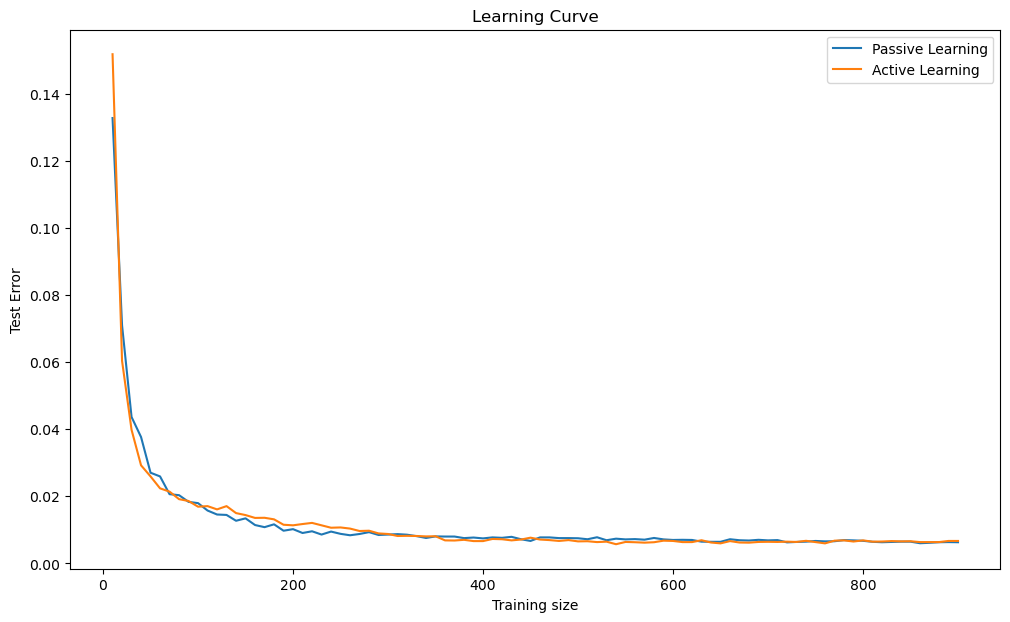

In [82]:
x = 10 * np.arange(1, 91)
fig, axes = plt.subplots(figsize=(12, 7))
axes.plot(x, 1 - plearning_curve, label='Passive Learning')
axes.plot(x, 1 - alearning_curve, label='Active Learning')
axes.set_xlabel("Training size")
axes.set_ylabel("Test Error")
axes.legend()
axes.set_title("Learning Curve")
plt.show()

### Citations

1. https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
2. https://www.geeksforgeeks.org/divide-a-pandas-dataframe-randomly-in-a-given-ratio/
3. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
4. https://www.datarobot.com/blog/active-learning-machine-learning/
5. https://www.institutedata.com/us/blog/passive-learning-vs-active-learning-finding-the-more-effective-method/
6. https://stackoverflow.com/questions/6541123/improve-subplot-size-spacing-with-many-subplots